# Project 2

## Reg_no: DS090

It's important that you fill in your registration number for proper documentation.

 **This is a dataset on weekly sales of different grocery stores. 
Use what you've learned to answer the following questions.**

[Link to data set](https://raw.githubusercontent.com/Tiamiyu1/Python-for-Data-Science-and-Analytics/main/Data/store_data.csv)



You can copy and paste the link directly into pd.read_csv('')

## Given store sales data, use Python to draw conclusions about how these stores are performing.

In [ ]:
# imports libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datatime
%matplotlib inline

### 1. Which store has the highest total sales for the final month of data?

In [ ]:
# code here 
data = pd.read_csv("https://raw.githubusercontent.com/Tiamiyu1/Python-for-Data-Science-and-Analytics/main/Data/store_data.csv")
data.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [ ]:
data2 = data.copy()

In [ ]:
# week is in object datatype, lets convert it to datatime and if possible rename the column from week to date
data2['week'] = pd.to_datetime(data2['week'])

In [ ]:
data2 = data2.rename(columns={'week':  'Date'}) #rename columns

In [ ]:
data2 = data2.set_index('Date')

In [ ]:
data2= data2.set_index(data2.index.to_period('M'))

In [ ]:
month_sales = data2.loc[data2.index[-1]].sum()

In [ ]:
month_sales

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

In [ ]:
month_sales = month_sales.reset_index()

In [ ]:
month_sales = month_sales.rename(columns={'index': 'stores', 0: 'total_sales'})

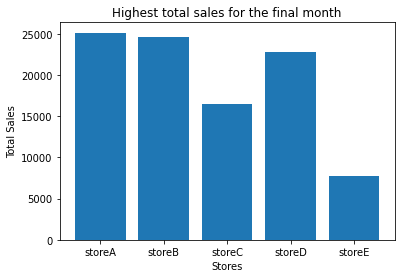

In [ ]:
plt.bar('stores', 'total_sales', data = month_sales);
plt.xlabel('Stores');
plt.ylabel('Total Sales')
plt.title('Highest total sales for the final month');

E.g. store X has the highest total sales for the final month of data

In [ ]:
# Write your answer below as text
"""storeA has the highest total sales for the final month"""

'storeA has the highest total sales for the final month'

In [ ]:
# data1.loc[data1.index[-1]].sum().idxmax()

### 2. Which store makes the most sales on average?

In [ ]:
# Write your answer below as text
"""
The store that has the highest score is storeB
"""

cols = ['storeA', 'storeB', 'storeC', 'storeD', 'storeE']

In [ ]:
df = data[cols]

In [ ]:
df_avg = df.mean()

In [ ]:
df_avg = df_avg.reset_index()

In [ ]:
df_avg

,index,0
0,storeA,5865.480
1,storeB,6756.710
2,storeC,4942.105
3,storeD,5431.405
4,storeE,2580.025


In [ ]:
df_avg = df_avg.rename(columns = {0 : 'avg_sales'})

In [ ]:
df_avg

,index,avg_sales
0,storeA,5865.480
1,storeB,6756.710
2,storeC,4942.105
3,storeD,5431.405
4,storeE,2580.025


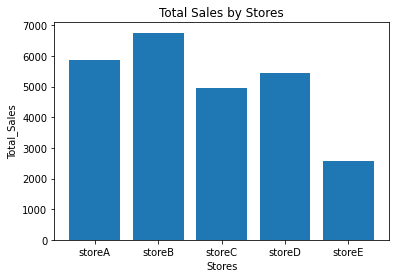

In [ ]:
# provide a visualization for your answer
plt.bar('index', 'avg_sales', data = df_avg);
plt.xlabel('Stores');
plt.ylabel('Total_Sales');
plt.title('Total Sales by Stores');

### 3. Which store sells the most during the week of March 13th, 2016?

In [ ]:
# code here 
march_week = data[data['week'] =='2016-03-13']

# Write your answer below as text
"""During the week of March 13th 2016, storeD sold the most"""

'During the week of March 13th 2016, storeD sold the most'

In [ ]:
# provide a visualization for your answer
march_week

,week,storeA,storeB,storeC,storeD,storeE
97,2016-03-13,2054,1390,5112,5513,2536


In [ ]:
march_week = march_week.melt('week')

In [ ]:
march_week

,week,variable,value
0,2016-03-13,storeA,2054
1,2016-03-13,storeB,1390
2,2016-03-13,storeC,5112
3,2016-03-13,storeD,5513
4,2016-03-13,storeE,2536


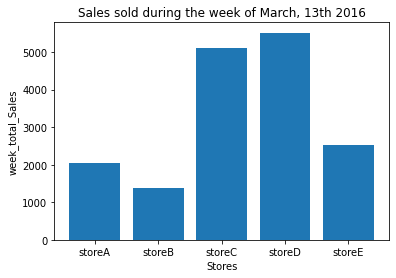

In [ ]:
plt.bar('variable', 'value', data = march_week);
plt.xlabel('Stores');
plt.ylabel('week_total_Sales');
plt.title('Sales sold during the week of March, 13th 2016');

### 4. In what week does store C make its worst sales?

In [ ]:
# code here 

data['storeC'].min() #first let's get the min value of storeC

927

In [ ]:
worst_storec = data[data['storeC'] == 927] 
# we query our with the min value we got

# Write your answer below as text
# """from the data we can see that the week storeC has the worst sales was on 2014-07-06"""

In [ ]:
worst_storec

,week,storeA,storeB,storeC,storeD,storeE
9,2014-07-06,8567,3228,927,3277,168


In [ ]:
worst_storec = worst_storec.melt('week', var_name = 'Store_name', value_name = 'total_sales')

In [ ]:
worst_storec.head()

,week,Store_name,total_sales
0,2014-07-06,storeA,8567
1,2014-07-06,storeB,3228
2,2014-07-06,storeC,927
3,2014-07-06,storeD,3277
4,2014-07-06,storeE,168


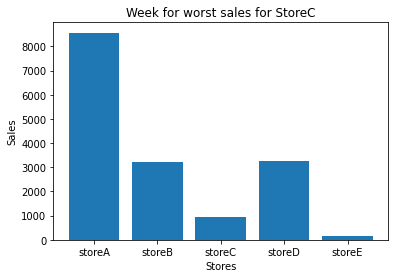

In [ ]:
# provide a visualization for your answer
plt.bar('Store_name', 'total_sales', data=worst_storec);
plt.xlabel('Stores');
plt.ylabel('Sales');
plt.title('Week for worst sales for StoreC');

### 5. Which store has the most sales in the latest 3-month period?

In [ ]:
# let's create a month column
data['Month'] = pd.DatetimeIndex(data['week']).month

In [ ]:
month_3 = data.tail(3)

# The store with the most sales in the last 3 months is StoreA

In [ ]:
col = ['storeA',	'storeB',	'storeC',	'storeD',	'storeE']
month_3 = month_3[col]

In [ ]:
month_3 = month_3.sum().reset_index()

In [ ]:
month_3 = month_3.rename(columns = {'index': 'Stores', 0:'total_sales'})

In [ ]:
month_3

,Stores,total_sales
0,storeA,20274
1,storeB,18092
2,storeC,12260
3,storeD,16827
4,storeE,6329


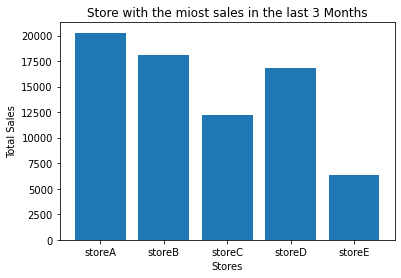

In [ ]:
# provide a visualization for your answer
plt.bar('Stores', 'total_sales', data=month_3);
plt.xlabel('Stores');
plt.ylabel('Total Sales');
plt.title('Store with the miost sales in the last 3 Months');